In [120]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('https://gist.githubusercontent.com/hamam14/7b4479855053c0c5406da934a7c55979/raw/ec16d0e4da5e7c1f5cabeb8c4de0987dc8b8786c/gistfile1.txt')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [122]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

def check_df(dataframe, head = 5):
  print("##################### HEAD ######################")
  print(dataframe.head())
  print("#################### INFO #######################")
  print(dataframe.info())
  print("################## QUANTILES ####################")
  print(dataframe.describe().T)
  print("#################### NA #########################")
  print(dataframe.isnull().sum())
  
check_df(df)

##################### HEAD ######################
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
#################### INFO #######################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
################## QUANTILES ####################
        count     mean        std    min    25%    50%    75%    max
Height  500.0  169.944  16.375261  140.0  156.0  170.5  184.0  199.0
Weight  500.0  106.000  32.382607   50.0   80.0  106.0  136.0  160.0
Index   500.0    3.748   1.355053    0.0    3.0    4.0    5.0    5.0


In [123]:
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

Gender : ['Male' 'Female']

Height : [174 189 185 195 149 147 154 169 159 192 155 191 153 157 140 144 172 151
 190 187 163 179 178 160 197 171 175 161 182 188 181 168 176 196 164 143
 141 193 194 180 165 166 186 198 145 183 177 170 142 199 150 146 148 184
 158 167 156 162 173 152]

Weight : [ 96  87 110 104  61  92 111  90 103  81  80 101  51  79 107 129 145 139
 149  97  67  64  95  62 159 152 121  52  65 131 153 132 114 120 108  56
 118 126  76 122  72 135  54 105 116  89 127  70  88 143  83 158  59  82
 136 117  75 100 154 140 123  50 141 119 156  69 155 160 106  66 157  60
  57 138 115 151 150 147 124  85 125 146  98  84 102  99  78 109  94  74
  73 134 137 144  93  86 130  58 148  68  71  63  91 142 133  77 128 112
  55  53]

Index : [4 2 3 5 1 0]



In [124]:
df["BMI"] = round(df["Weight"]/((df["Height"])/100)**2, 2)   #Weight(Kg)/Height(m)^2
df.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48


In [125]:
def index(x):
    if x["BMI"] <18.5:
        return 0
    elif 18.5<= x["BMI"] < 25:
        return 1
    elif 25<= x["BMI"] < 30:
        return 2
    elif 30<= x["BMI"] < 35:
        return 3
    elif 35<= x["BMI"] < 40:
        return 4
    elif x["BMI"] >= 40:
        return 5
df["New_Index"] = df.apply(index, axis=1)
df.head()

,Gender,Height,Weight,Index,BMI,New_Index
0,Male,174,96,4,31.71,3
1,Male,189,87,2,24.36,1
2,Female,185,110,4,32.14,3
3,Female,195,104,3,27.35,2
4,Male,149,61,3,27.48,2


In [126]:
def status(x):
    if x["New_Index"] == 0:
        return "Underweight"
    elif x["New_Index"] == 1:
        return "Normal weight"
    elif x["New_Index"] == 2:
        return "Pre-Obesity"
    elif x["New_Index"] == 3:
        return "Obese Class I"
    elif x["New_Index"]== 4:
        return "Obese Class II"
    elif x["New_Index"] == 5:
        return "Obese Class III"
df["Status"] = df.apply(status, axis=1)
df.head()

,Gender,Height,Weight,Index,BMI,New_Index,Status
0,Male,174,96,4,31.71,3,Obese Class I
1,Male,189,87,2,24.36,1,Normal weight
2,Female,185,110,4,32.14,3,Obese Class I
3,Female,195,104,3,27.35,2,Pre-Obesity
4,Male,149,61,3,27.48,2,Pre-Obesity


BMI	Nutritional status:

Below 18.5  : **Underweight**

18.5–24.9   : **Normal weight**
 
25.0–29.9   : **Pre-obesity**
 
30.0–34.9   : **Obesity class I**

35.0–39.9   : **Obesity class II**

Above 40    : **Obesity class III**

In [127]:
df.drop(["Index"],axis=1,inplace = True)

In [128]:
df.head(30)

,Gender,Height,Weight,BMI,New_Index,Status
0,Male,174,96,31.71,3,Obese Class I
1,Male,189,87,24.36,1,Normal weight
2,Female,185,110,32.14,3,Obese Class I
3,Female,195,104,27.35,2,Pre-Obesity
4,Male,149,61,27.48,2,Pre-Obesity
5,Male,189,104,29.11,2,Pre-Obesity
6,Male,147,92,42.57,5,Obese Class III
7,Male,154,111,46.80,5,Obese Class III
8,Male,174,90,29.73,2,Pre-Obesity
9,Female,169,103,36.06,4,Obese Class II


In [129]:
num_cols = [col for col in df.columns if df[col].dtype in ["int", "float"]]
corr = df[num_cols].corr()
corr

,Height,Weight,BMI,New_Index
Height,1.000000,0.000446,-0.531997,-0.429130
Weight,0.000446,1.000000,0.827024,0.825582
BMI,-0.531997,0.827024,1.000000,0.882542
New_Index,-0.429130,0.825582,0.882542,1.000000


In [130]:
cor_matrix = df.corr().abs()

<ipython-input-130-9133cabe93f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr().abs()


In [131]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
upper_triangle_matrix

<ipython-input-131-74589b213b32>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


,Height,Weight,BMI,New_Index
Height,NaN,0.000446,0.531997,0.429130
Weight,NaN,NaN,0.827024,0.825582
BMI,NaN,NaN,NaN,0.882542
New_Index,NaN,NaN,NaN,NaN


Obese Class III    202
Pre-Obesity         69
Obese Class I       65
Normal weight       65
Obese Class II      65
Underweight         34
Name: Status, dtype: int64



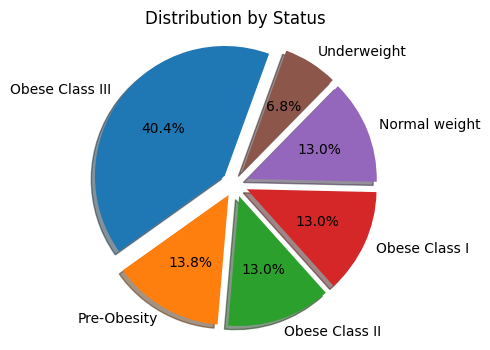

In [132]:
print(df["Status"].value_counts())
print()

label =  "Obese Class III", "Pre-Obesity", "Obese Class II", "Obese Class I","Normal weight", "Underweight"
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
sizes = df["Status"].value_counts(normalize = True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = label, autopct="%1.1f%%", shadow=True, startangle=70)
ax1.axis("equal") 
plt.title("Distribution by Status")
plt.rcParams['figure.figsize'] = [5, 5]
plt.show();

Female    255
Male      245
Name: Gender, dtype: int64



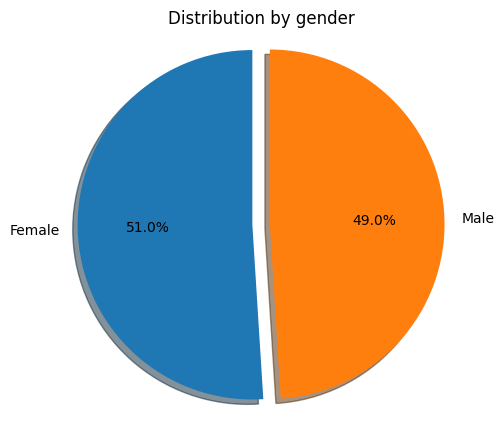

In [133]:
print(df["Gender"].value_counts())
print()

label =  "Female", "Male"
explode = (0, 0.1)
sizes = df["Gender"].value_counts(normalize = True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal") 
plt.title("Distribution by gender")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show();

# Machine Learning

In [134]:
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [135]:
X = df.drop(["New_Index", "Gender", "Status"], axis=1)
y = df["New_Index"]

In [136]:
df.drop(["New_Index", "Gender", "Status"], axis=1)

,Height,Weight,BMI
0,174,96,31.71
1,189,87,24.36
2,185,110,32.14
3,195,104,27.35
4,149,61,27.48
...,...,...,...
495,150,153,68.00
496,184,121,35.74
497,141,136,68.41
498,150,95,42.22


In [137]:
y

0      3
1      1
2      3
3      2
4      2
      ..
495    5
496    4
497    5
498    5
499    5
Name: New_Index, Length: 500, dtype: int64

In [138]:
X

,Height,Weight,BMI
0,174,96,31.71
1,189,87,24.36
2,185,110,32.14
3,195,104,27.35
4,149,61,27.48
...,...,...,...
495,150,153,68.00
496,184,121,35.74
497,141,136,68.41
498,150,95,42.22


In [139]:
y

0      3
1      1
2      3
3      2
4      2
      ..
495    5
496    4
497    5
498    5
499    5
Name: New_Index, Length: 500, dtype: int64

In [140]:
minmaxxx = MinMaxScaler()
X = minmaxxx.fit_transform(X)

In [141]:
# Simpan model ke dalam file
with open('minmaxxx.pkl', 'wb') as file:
    pickle.dump(minmaxxx, file)

In [142]:
X

array([[0.57627119, 0.41818182, 0.28683812],
       [0.83050847, 0.33636364, 0.17564297],
       [0.76271186, 0.54545455, 0.29334342],
       ...,
       [0.01694915, 0.78181818, 0.84205749],
       [0.16949153, 0.40909091, 0.44583964],
       [0.55932203, 0.73636364, 0.46928896]])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# KNN

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Memisahkan data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model KNN dan melatihnya dengan data latih
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Melakukan prediksi dengan model KNN menggunakan data uji
y_pred = knn_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = knn_model.score(X_test, y_test)
print("KNN Accuracy:", accuracy)

# Menyimpan model KNN ke dalam file menggunakan pickle
filename = 'knn_model.pkl'
pickle.dump(knn_model, open(filename, 'wb'))
print("Model saved as", filename)


KNN Accuracy: 0.87
Model saved as knn_model.pkl


In [145]:
import pickle

# Simpan model ke dalam file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [151]:
print(knn_model.predict(X_new1)[0])

3


# NAIVE BAYES

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Memisahkan data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat objek klasifikasi Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model Naive Bayes dengan data latih
naive_bayes_model.fit(X_train, y_train)

# Melakukan prediksi dengan model Naive Bayes menggunakan data uji
y_pred = naive_bayes_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = naive_bayes_model.score(X_test, y_test)
print("Naive Bayes Accuracy:", accuracy)


Naive Bayes Accuracy: 0.97


In [147]:
X_new2 = np.array([[185, 110, 32.14]])

In [148]:
X_new1 = minmaxxx.transform(X_new2)
X_new1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.76271186, 0.54545455, 0.29334342]])

In [149]:
# Menyimpan model Naive Bayes ke dalam file menggunakan pickle
filename = 'naive_bayes_model.pkl'
pickle.dump(naive_bayes_model, open(filename, 'wb'))
print("Model saved as", filename)

Model saved as naive_bayes_model.pkl


In [150]:
print(naive_bayes_model.predict(X_new1)[0])

3
